In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from scipy.integrate import solve_ivp
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from example_funcs import *

# Assignment 2 Q5 - Predator-Prey model

## Set parameters and IC

In [6]:
# set parameters
r = 2
m = 2.5
a = 1
b = 3

p = np.array([r,m,a,b])

def GH_model(t,x):
    xout = PredatorPrey(t,x,p)
    return xout

In [7]:
# set initial conditions
x01 = np.array([10,10]);
x02 = np.array([1,5]);
x03 = np.array([3,1]);

## Solve IVPs

In [9]:
# set time bounds
tspan = [0,100]

sol1 = solve_ivp(GH_model,tspan,x01)
sol2 = solve_ivp(GH_model,tspan,x02)
sol3 = solve_ivp(GH_model,tspan,x03)

### Plot solution in phase plane

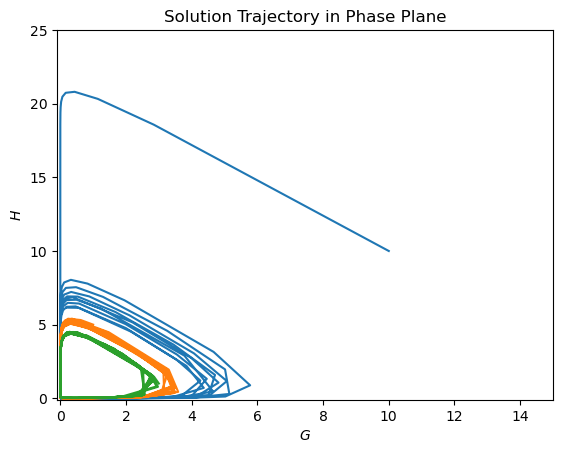

In [21]:
plt.plot(sol1.y[0,:],sol1.y[1,:])
plt.plot(sol2.y[0,:],sol2.y[1,:])
plt.plot(sol3.y[0,:],sol3.y[1,:])
plt.xlabel("$G$")
plt.ylabel("$H$")
plt.title("Solution Trajectory in Phase Plane")
plt.xlim([-0.1, 15])
plt.ylim([-0.1, 25])

plt.show()

## Plot solution in time

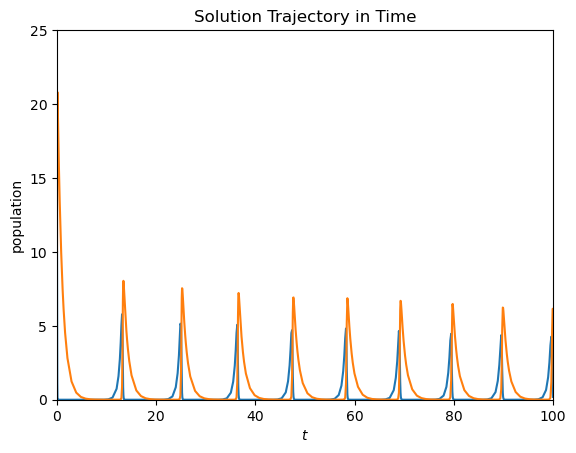

In [20]:
plt.plot(sol1.t,sol1.y[0,:])
plt.plot(sol1.t,sol1.y[1,:])
plt.xlabel("$t$")
plt.ylabel("population")
plt.title("Solution Trajectory in Time")
plt.xlim([0, 100])
plt.ylim([0, 25])

plt.show()

### Interpretation
When starting with initial conditions of 10 grass, 10 horses, we see the horses initially boom in population, while the grass is consumed entirely. With no grass to eat, the horses slowly die off.  Once the horses drop below a critical level, the grass can begin to grow again and has a sharp increase in population. Once there is a sufficient amount of grass the horses can begin to grow in numbers again. Thus the cycle restarts.